#### 앞으로 우리가 해야할 프로세스는 대략 아래와 같습니다.

1) 데이터셋 확인
 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
  

2) 탐색적 데이터 분석(EDA: exploratory data analysis)
 - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

3) feature engineering
 - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

4) model 만들기
 - sklearn 을 사용해 모델을 만듭니다. 
 - 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.

5) 모델 학습 및 예측
 - train-set 을 가지고 모델을 학습시킨 후, test-set 을 가지고 prediction 합니다.

6) 모델 평가
 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

### 1. Defining the problem statement and Goal
- peak measurement point estimation(scanning-mode: zt)
- beamstyleindex 12(CW-mode) 인 경우, 제거
- one hot encoding: txpgWaveformStyle, probeId

### 2. Collecting the Data
- Train data set and test data set을 가지고 있는 파일 load

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set() # setting seaborn default for plots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
import pandas as pd
df_AOP = pd.read_csv('sample.csv')

##### 1) 데이터셋 확인
 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

In [3]:
df_AOP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6402 entries, 0 to 6401
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   measSetId             6402 non-null   int64  
 1   probeId               6402 non-null   int64  
 2   beamstyleIndex        6402 non-null   int64  
 3   txFrequencyHz         6402 non-null   float64
 4   focusRangeCm          6402 non-null   float64
 5   numTxElements         6402 non-null   int64  
 6   txpgWaveformStyle     6402 non-null   int64  
 7   numTxCycles           6402 non-null   float64
 8   elevAperIndex         6402 non-null   int64  
 9   IsTxAperModulationEn  6402 non-null   int64  
 10  probeName             6402 non-null   object 
 11  probePitchCm          6402 non-null   float64
 12  probeRadiusCm         6402 non-null   float64
 13  probeElevAperCm0      6402 non-null   float64
 14  probeElevFocusRangCm  6402 non-null   float64
 15  measResId            

In [10]:
df_AOP.head()

,measSetId,probeId,beamstyleIndex,txFrequencyHz,focusRangeCm,numTxElements,txpgWaveformStyle,numTxCycles,elevAperIndex,IsTxAperModulationEn,probeName,probePitchCm,probeRadiusCm,probeElevAperCm0,probeElevFocusRangCm,measResId,zt,RankNo
0,1,11291796,0,1538500.0,2.0,47,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,678,5.1,1
1,2,11291796,0,1538500.0,4.0,93,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,369,4.4,1
2,3,11291796,0,1538500.0,6.0,96,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,370,4.5,1
3,4,11291796,0,1538500.0,8.0,96,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,371,4.7,1
4,5,11291796,0,1538500.0,10.0,96,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,372,4.6,1


In [5]:
## beamstyleIndex 확인하기.
np_beamidx = df_AOP['beamstyleIndex'].values
np.unique(np_beamidx, return_counts=True)

(array([ 0,  1,  4,  5,  8, 10, 15, 18], dtype=int64),
 array([1832, 2110,  612, 1074,   48,  644,    2,   80], dtype=int64))

##### 2) 탐색적 데이터 분석(EDA: exploratory data analysis)
 - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

##### a) Target(zt) 분석

In [6]:
df_AOP['zt'].describe()

count    6402.000000
mean        2.790159
std         1.591822
min         0.500000
25%         1.300000
50%         3.000000
75%         4.300000
max         6.600000
Name: zt, dtype: float64

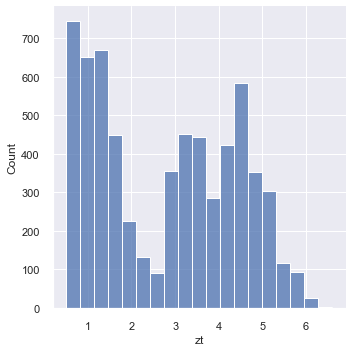

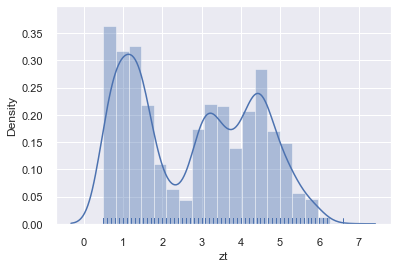

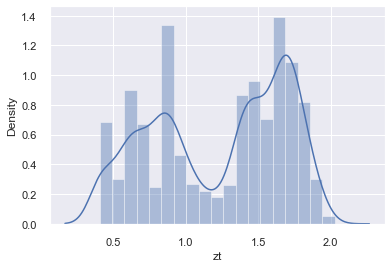

In [24]:
sns.displot(df_AOP['zt'])
plt.show()

sns.distplot(df_AOP['zt'], kde=True, rug=True)
plt.show()

zt_log = np.log1p(df_AOP['zt'])
sns.distplot(zt_log)
plt.show()

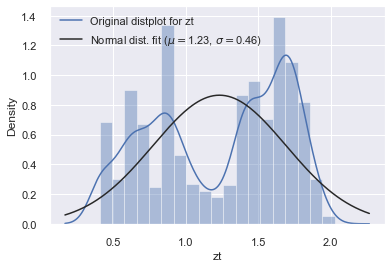

In [23]:
from scipy import stats

## 아래 zt_log로 변환하여 입력(원래, df_AOP['zt'])
ax = sns.distplot(zt_log, fit=stats.norm)
(mu, sigma) = stats.norm.fit(zt_log)
# print("mu={}, sigma={}".format(mu, sigma))

# Legend and labels 
plt.legend(["Original distplot for zt","Normal dist. fit ($\mu=${0:.2f}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.show()

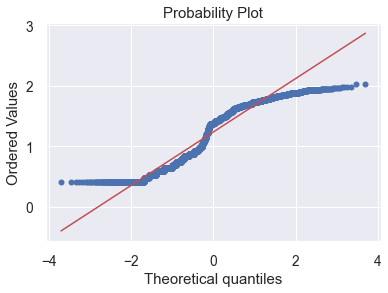

In [53]:
res = stats.probplot(zt_log, dist='norm', plot=plt)

((array([-3.69890795, -3.46736533, -3.33993779, ...,  3.33993779,
          3.46736533,  3.69890795]),
  array([0.5       , 0.5       , 0.5       , ..., 6.19999981, 6.5999999 ,
         6.5999999 ])),
 (1.5324982671562921, 2.7901593248608036, 0.9622926450600591))

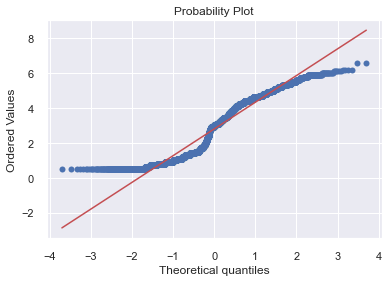

In [13]:
stats.probplot(df_AOP['zt'], dist='norm', plot=plt)

#### zt에 대한 통계적 분포 및 데이터의 실효성 확인

In [15]:
#skewness and kurtosis
print("log1p Skewness: %f" % zt_log.skew())
print("log1p Kurtosis: %f" % zt_log.kurt())
print("Skewness: %f" % df_AOP['zt'].skew())
print("Kurtosis: %f" % df_AOP['zt'].kurt())

log1p Skewness: -0.278245
log1p Kurtosis: -1.340085
Skewness: 0.117000
Kurtosis: -1.358268


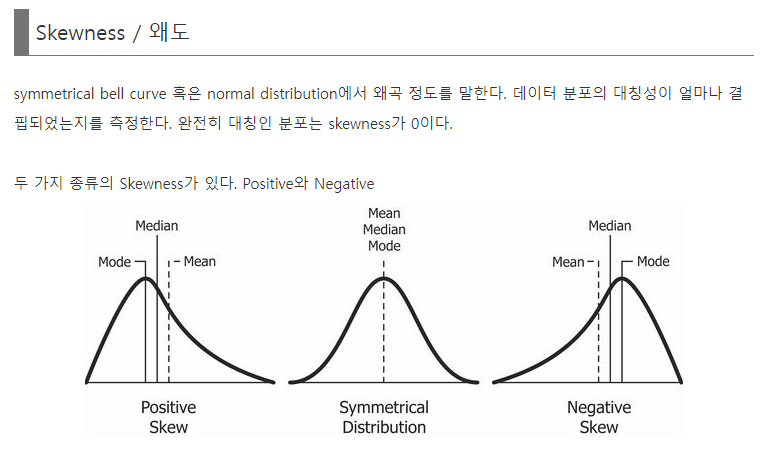
#### 언제 skewness(왜도)가 과도하게 커질까?
- skewness가 -0.5 ~ 0.5일 경우, 데이터는 상당히 대칭적
- skewness가 -1 ~ -0.5일 경우, 데이터는 적당히 치우쳐 있음
- skewness가 -1보다 작거나 1보다 클 경우, 데이터는 상당히 치우쳐 있다.

예시, 집값의 분포 피크가 평균값에서 왼쪽에 있을 경우, 많은 집들이 평균 이하의 가격에 팔리고 있다.

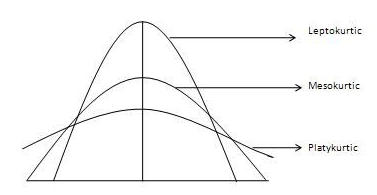
#### Kurtosis(첨도)는 분포 그래프의 꼬리부분에 관한 정도를 설명한다. 분포에 존재하는 극단적인 값들의 정도를 표현한다.
- kurtosis가 높으면, 어쩌면 잘못된 데이터 입력이나 다른 것들이 있을 수 있다는 가능성
- kurtosis가 낮으면, 데이터가 얇은 꼬리나 outlier를 가지고 있지 않다는 뜻이다.
    - 일반적으로 표준 정규 분포는 3의 kurtosis(첨도)를 갖는다.
    - 3 이상: 분포가 길고, 꼬리가 더 뚱뚱: 데이터가 꼬리쪽이 무겁거나 극단적인 값들이 많다.
    - 3 이하: 분포는 짧고, 꼬리가 정규분포보다 얇음: 데이터가 가벼운 편이나 극단적인 값들이 작다.

## Relationship with numerical variables

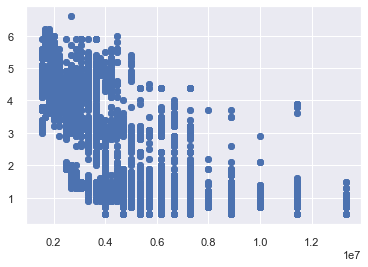

In [16]:
plt.scatter(df_AOP['txFrequencyHz'], df_AOP['zt'])

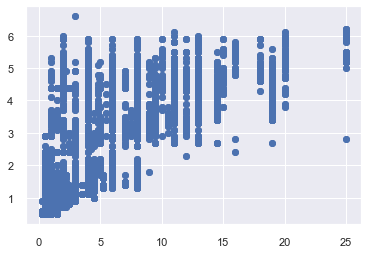

In [17]:
plt.scatter(df_AOP['focusRangeCm'], df_AOP['zt'])

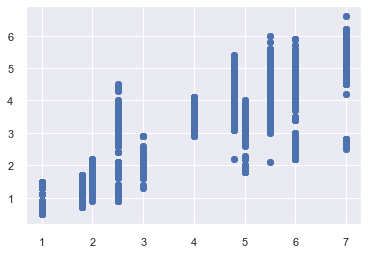

In [18]:
plt.scatter(df_AOP['probeElevFocusRangCm'], df_AOP['zt'])

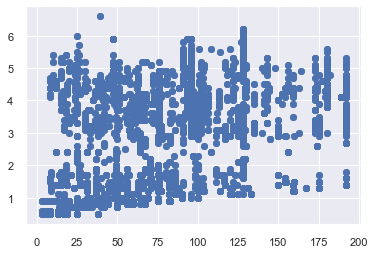

In [19]:
plt.scatter(df_AOP['numTxElements'], df_AOP['zt'])

In [41]:
df_AOP['txFrequencyHz'].describe()

count    6.402000e+03
mean     4.526716e+06
std      2.316568e+06
min      1.538500e+06
25%      2.666700e+06
50%      4.000000e+06
75%      6.153800e+06
max      1.333333e+07
Name: txFrequencyHz, dtype: float64

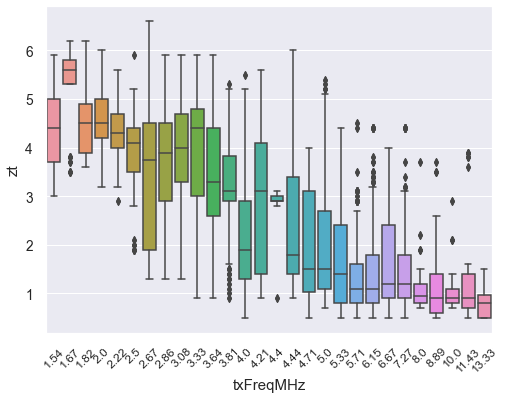

In [48]:
f, ax = plt.subplots(figsize=(8, 6))

df_AOP['txFreqMHz'] = round(df_AOP['txFrequencyHz'] / 1000000, 2)
fig = sns.boxplot(df_AOP['txFreqMHz'], df_AOP['zt'], data=df_AOP)

plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)

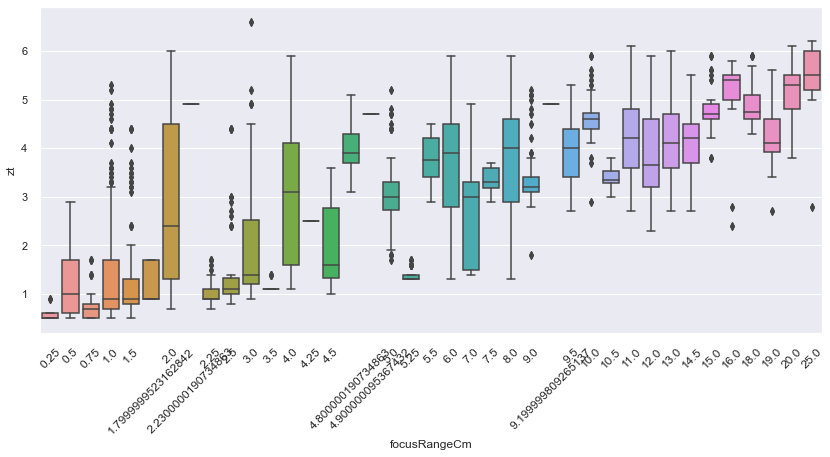

In [25]:
f, ax = plt.subplots(figsize=(14, 6))

fig = sns.boxplot(df_AOP['focusRangeCm'], df_AOP['zt'], data=df_AOP)

plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)

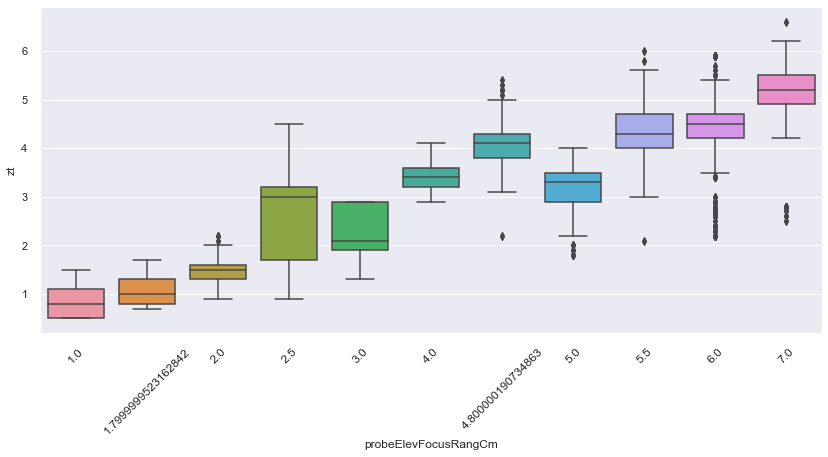

In [26]:
f, ax = plt.subplots(figsize=(14, 6))

fig = sns.boxplot(df_AOP['probeElevFocusRangCm'], df_AOP['zt'], data=df_AOP)

plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)

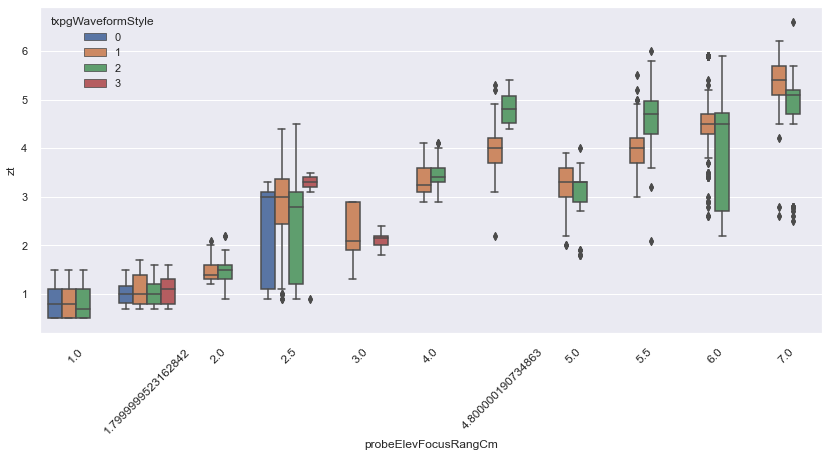

In [28]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(df_AOP['probeElevFocusRangCm'], df_AOP['zt'], hue=df_AOP['txpgWaveformStyle'], data=df_AOP)

plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)

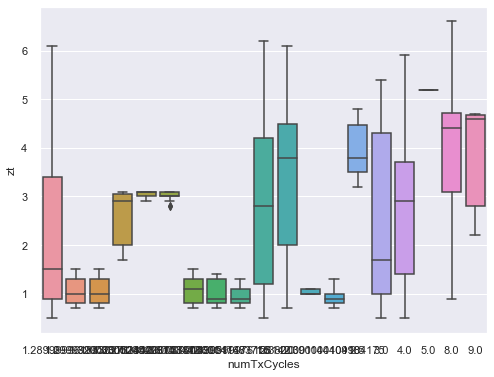

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(df_AOP['numTxCycles'], df_AOP['zt'], data=df_AOP)

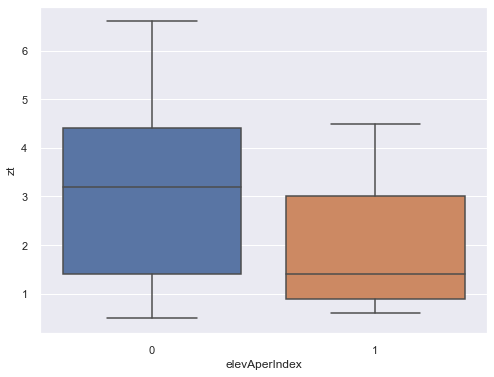

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(df_AOP['elevAperIndex'], df_AOP['zt'], data=df_AOP)

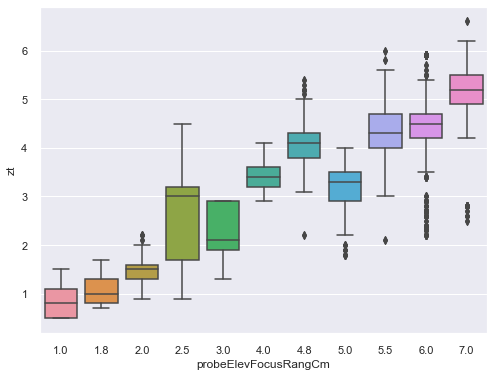

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(round(df_AOP['probeElevFocusRangCm'],3), df_AOP['zt'], data=df_AOP)

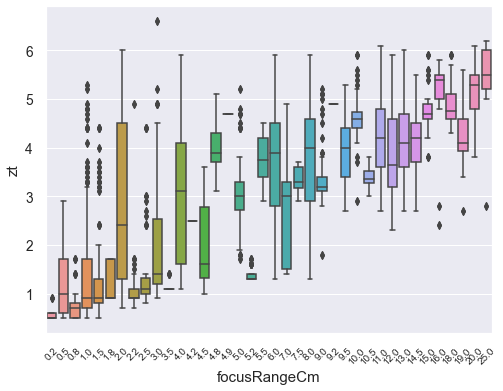

In [50]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(round(df_AOP['focusRangeCm'],1), df_AOP['zt'], data=df_AOP)

plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)

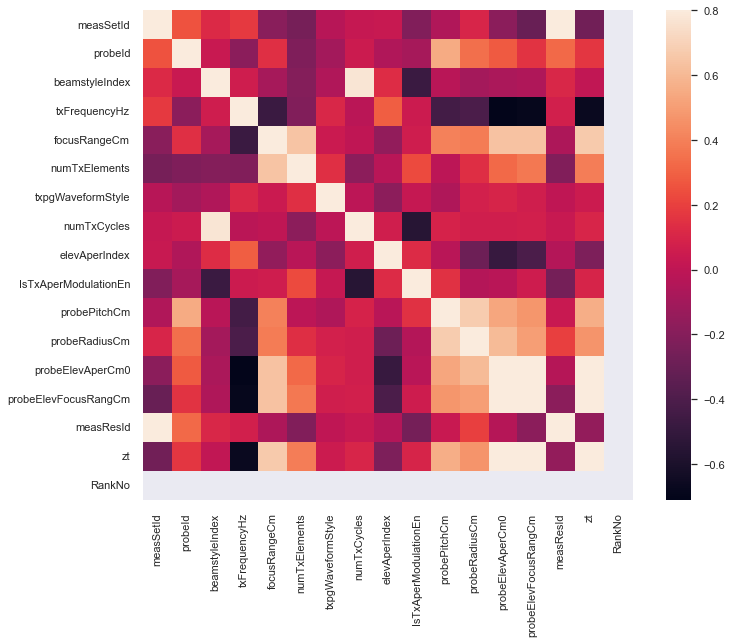

In [20]:
#correlation matrix
corrmat = df_AOP.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

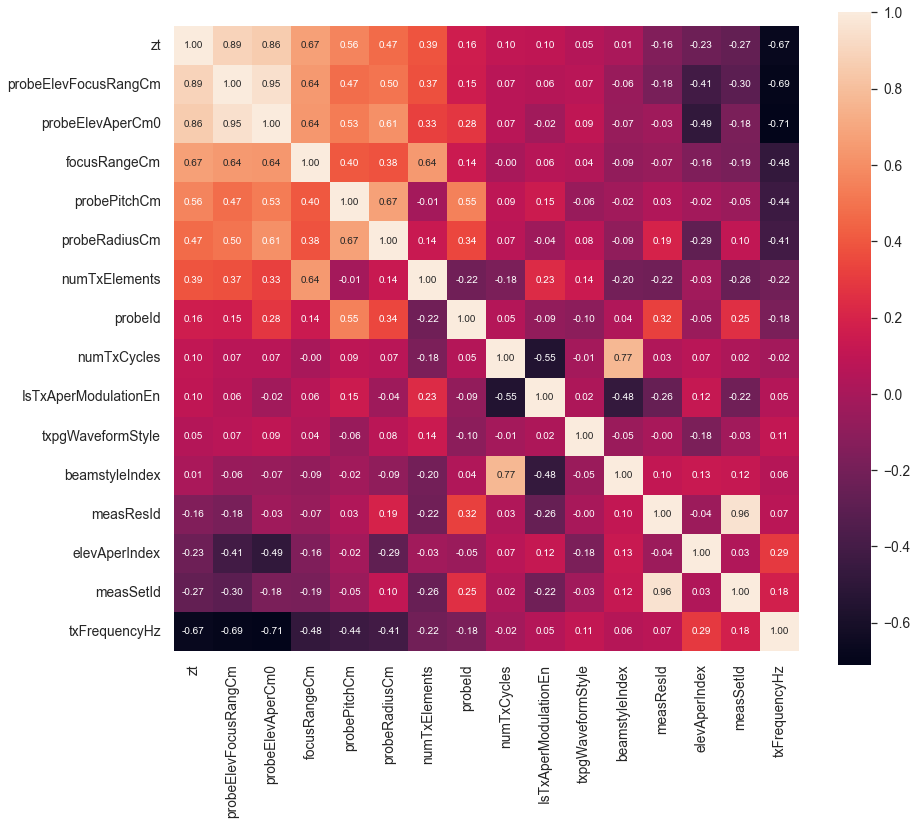

In [21]:
#zt correlation matrix
plt.figure(figsize=(14,12))
k = 17 #number of variables for heatmap
cols = corrmat.nlargest(k, 'zt')['zt'].index
cm = np.corrcoef(df_AOP[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

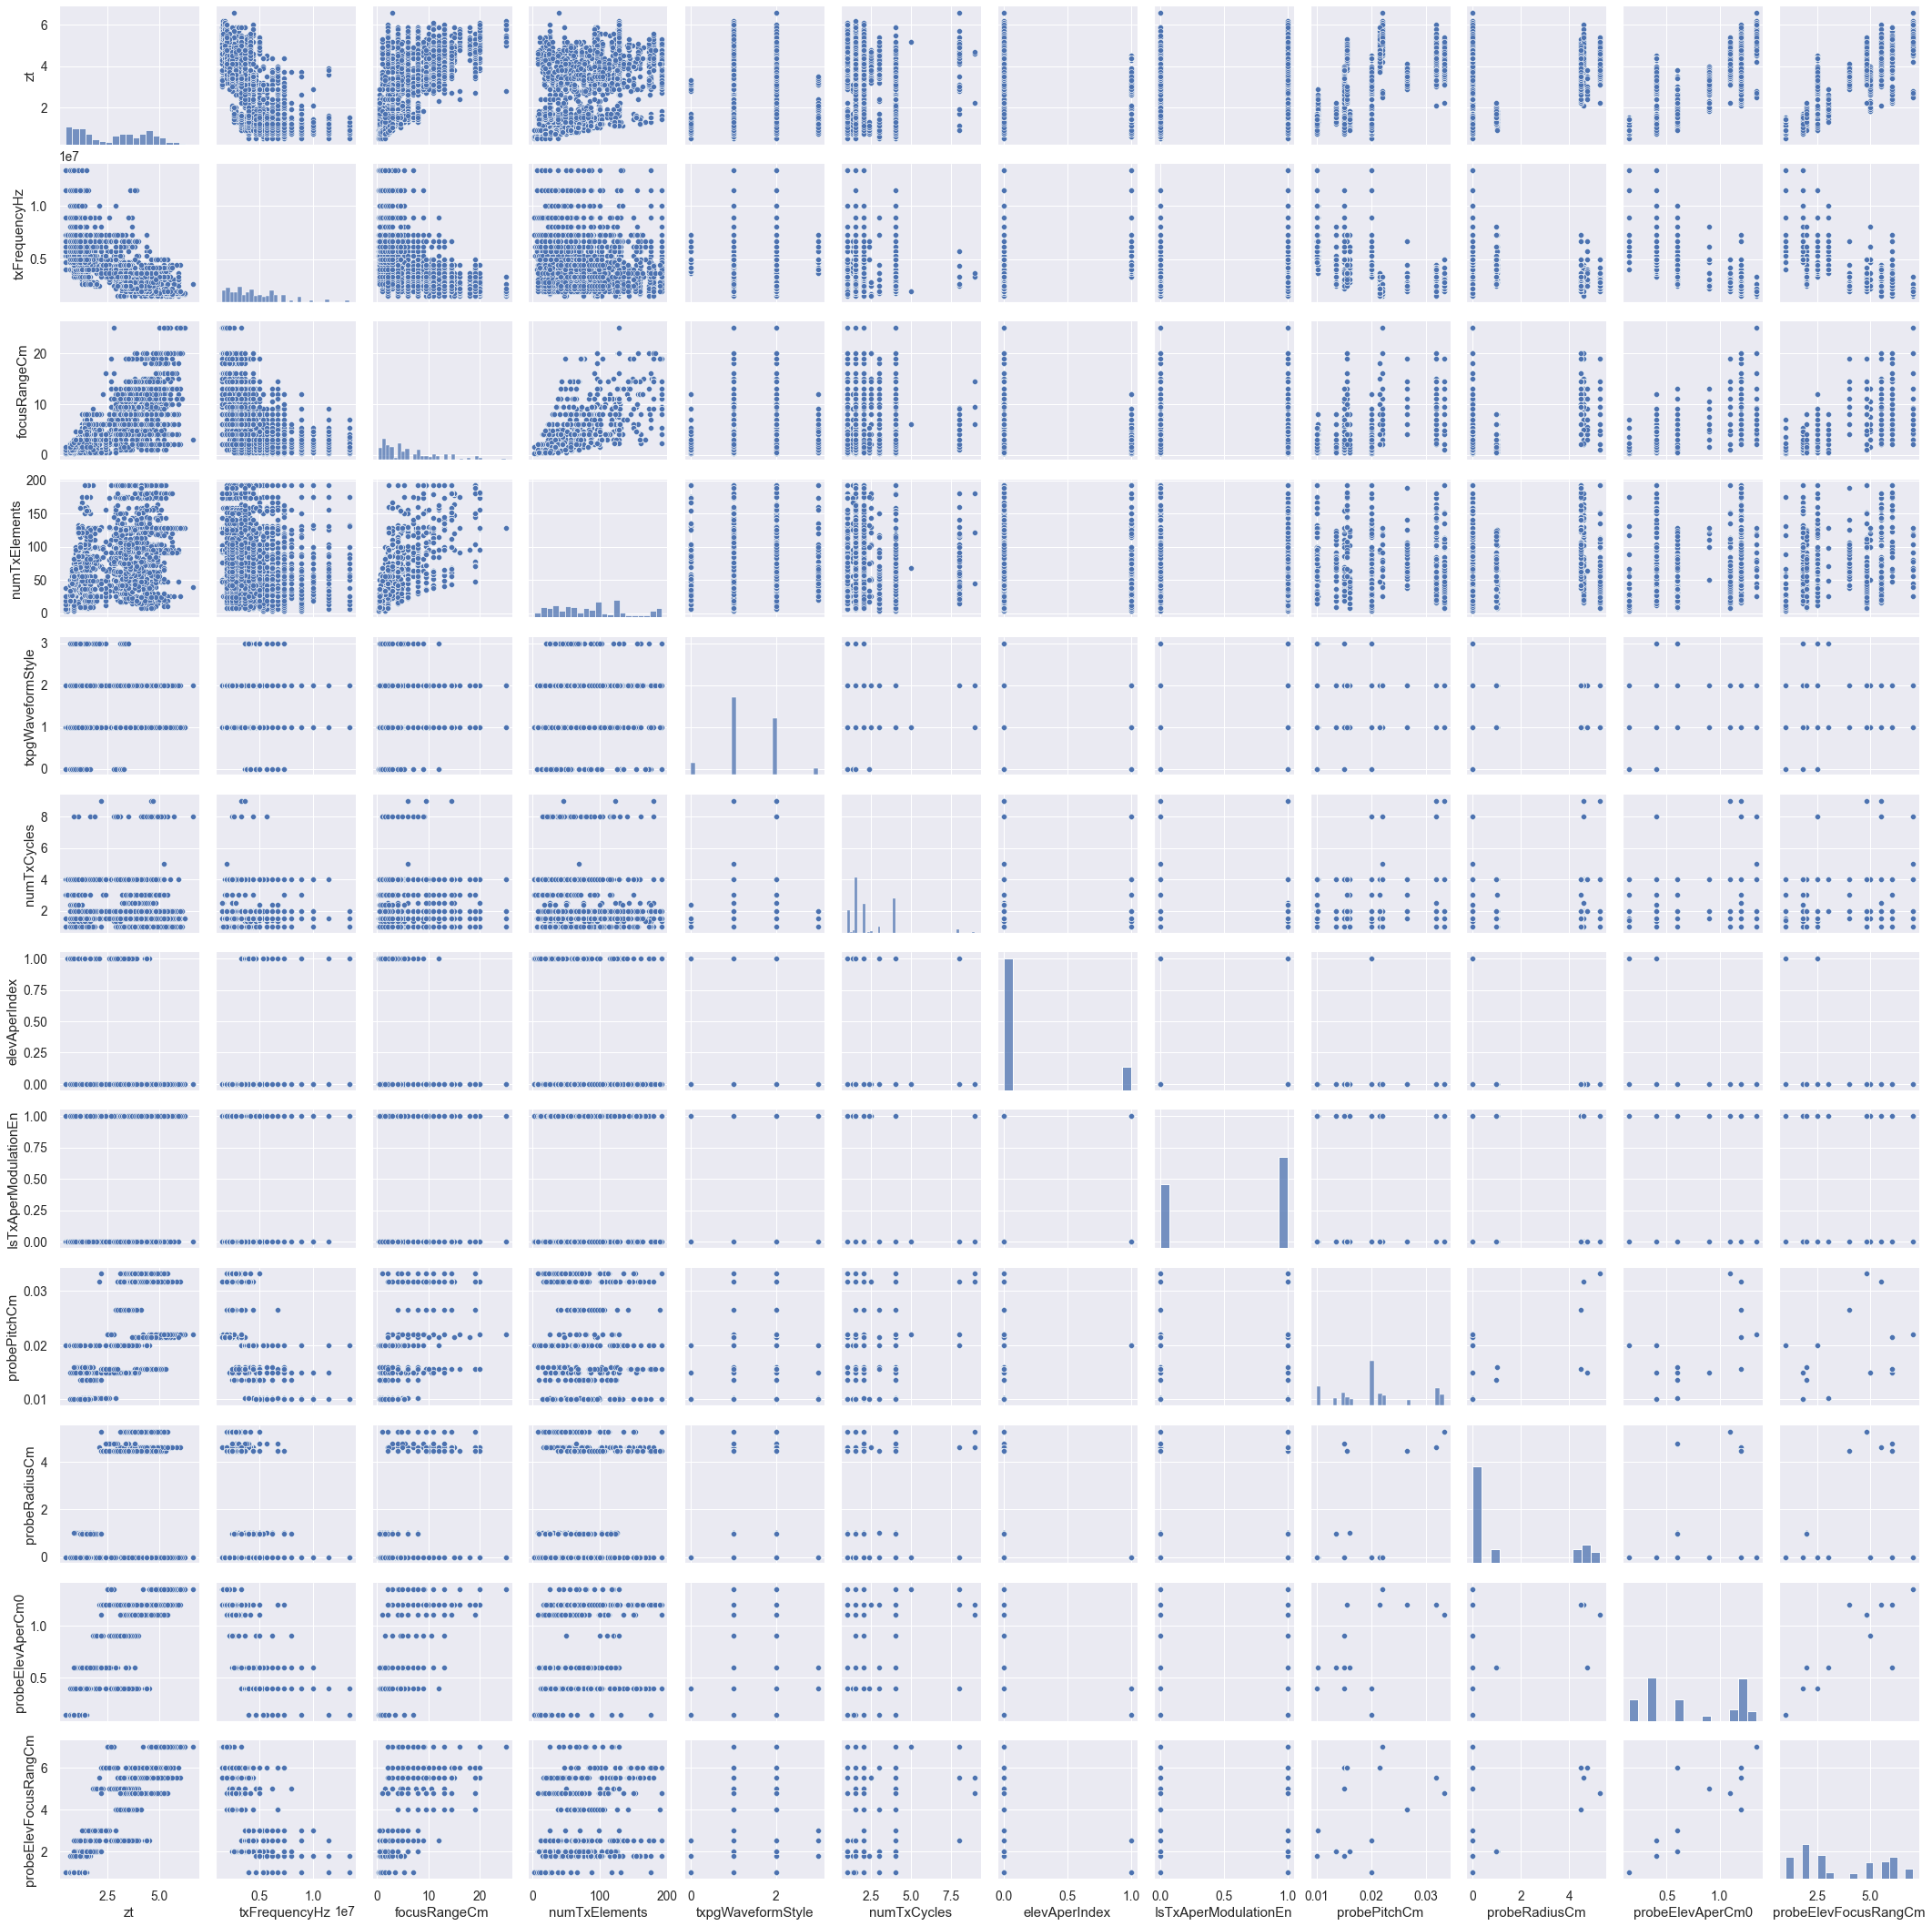

In [22]:
sns.set
cols = ['zt', 'txFrequencyHz', 'focusRangeCm', 'numTxElements', 'txpgWaveformStyle', 'numTxCycles', 'elevAperIndex',
        'IsTxAperModulationEn', 'probePitchCm', 'probeRadiusCm', 'probeElevAperCm0', 'probeElevFocusRangCm']
sns.pairplot(df_AOP[cols], size=2.5)
plt.show()